# Face Detection 
#### John Wu - 260612056

All training and testing data are stored in the **photos** directory. Individual photos have already been cropped.

## 1 - Data Acquisition

**You will need a group picture containing at least three people, with their faces clearly visible. This image will be used to evaluate the performance of your implementation. Display the image.**

**Find additional pictures for each individual; the required number of pictures varies with a number of factors, but ten for every person should suﬃce. These images will be used to build our representation of faces, and should be cropped to be the same size containing only faces. The dimension and use of color is left as a design decision; consider smaller greyscale images if you run into computational issues, or for reducing the dimensionality of the data. Describe how you selected the images with respect to the conditions of the detection/classiﬁcation methods.**

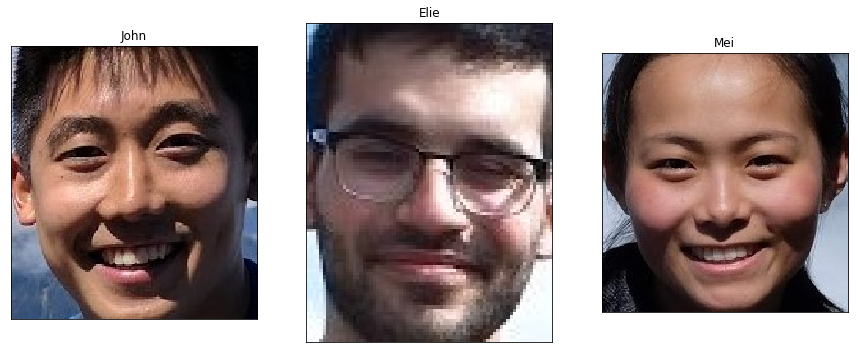

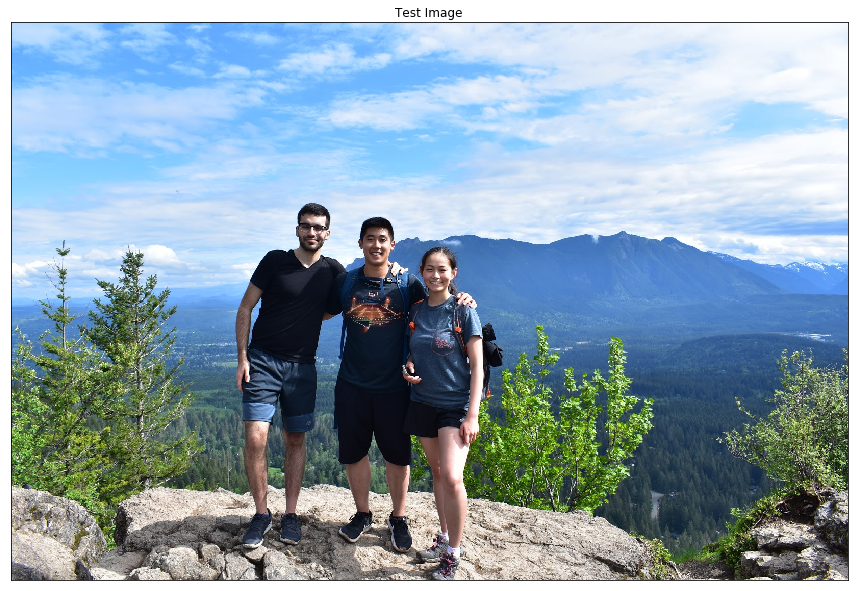

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# load training and testing data and normalize to the same size
original_test_image = cv2.imread('photos/group.jpg') 
data = {'john': [], 'elie': [], 'mei': []}
for person in data:
    for i in range(1,11):
        img = cv2.imread('photos/{}/{}.jpg'.format(person, i)) 
        data[person].append(img)

# show example of each training class
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv2.cvtColor(data['john'][0], cv2.COLOR_BGR2RGB))
plt.title('John'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(data['elie'][0], cv2.COLOR_BGR2RGB))
plt.title('Elie'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.cvtColor(data['mei'][0], cv2.COLOR_BGR2RGB))
plt.title('Mei'), plt.xticks([]), plt.yticks([])
plt.show()

# show the test image
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(original_test_image, cv2.COLOR_BGR2RGB))
plt.title('Test Image'), plt.xticks([]), plt.yticks([])
plt.show()

Images grayscaled and normalized to 96x96 pixels.


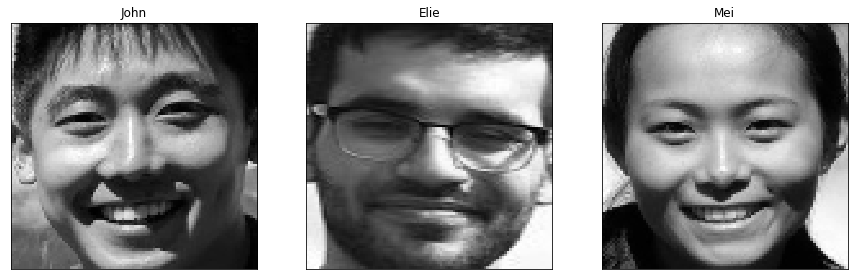

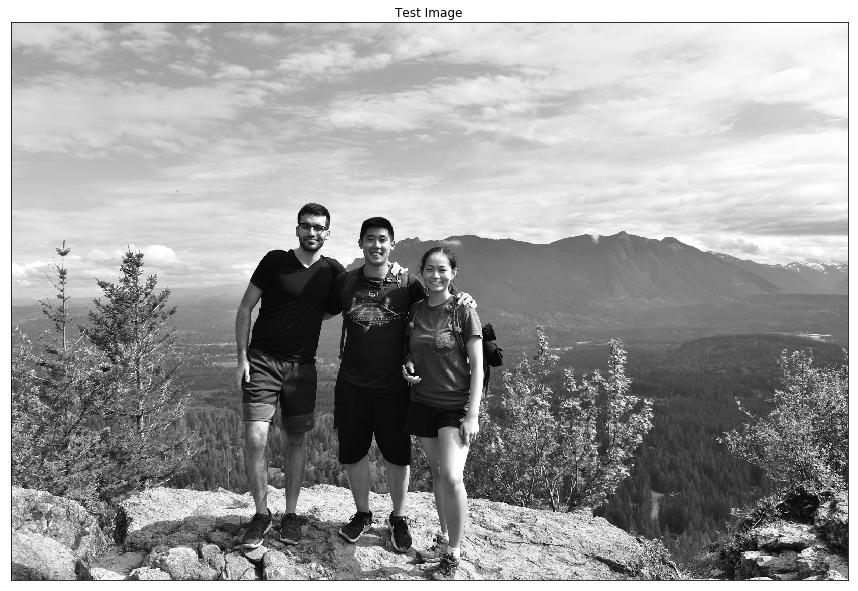

In [3]:
# convert images to gray scale and normalize
test_image = cv2.cvtColor(original_test_image, cv2.COLOR_BGR2GRAY)
for person in data:
    for i in range(10):
        img = cv2.cvtColor(data[person][i], cv2.COLOR_BGR2GRAY)  
        normalized = cv2.resize(img, (96, 96))
        data[person][i] = normalized
        
print('Images grayscaled and normalized to 96x96 pixels.')
        
# show example of each training class
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(data['john'][0], cmap='gray')
plt.title('John'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(data['elie'][0], cmap='gray')
plt.title('Elie'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(data['mei'][0], cmap='gray')
plt.title('Mei'), plt.xticks([]), plt.yticks([])
plt.show()

# show the test image
plt.figure(figsize=(15,15))
plt.imshow(test_image, cmap='gray')
plt.title('Test Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Selecting images in the data collection

The images were selected from a summer photo album that included individual images from varying hiking photos. 
Since the training set is relatively small, the following parameters were kept constant when selecting images:
* **Lighting** - all images were taken outdoors on a sunny day.
* **Angle** - all images were taken from a straight angle.
* **Accessories** - all images for each person were taken either with glasses on or without.

However, to ensure enough variance in order to predict new data accurately, the following parameters were varied when selecting images:
* **Facial expression** - all images varied slightly in facial expression.
* **Background** - all images were taken in varied backgrounds.

In order to normalize the appearance of images due to varying shadows and sizes, all images were grayscaled and resized to a 96x96 pixel image. This also reduces training and computation times.

## 2 - Eigenvector Representation

**Use PCA to ﬁnd the eigenvector representation of your training data.**

In [4]:
# reshape data and add to a training set
train_x, train_y = [], []
class_map = {'john': 0, 'elie': 1, 'mei': 2}
for person in data:
    for i in range(10):
        img = np.float64(data[person][i])
        img = img.reshape(-1)
        train_x.append(img)
        train_y.append(class_map[person])
        

# normalize pixels to a mean of 0
scaler = StandardScaler()
std_x = scaler.fit_transform(train_x)

# apply pca on varying number of components
c_range = range(1,31)
variances = []
for i in c_range:
    pca = PCA(n_components=i)
    reduced = pca.fit_transform(std_x)
    variances.append({'components': reduced, 'variance': pca.explained_variance_ratio_})

# print pca results
for v in variances:
    print('Shape of Reduced PCA Features: {}'.format(v['components'].shape))
    print('Principal Component Variances in Descending Order: {} \n'.format(v['variance']))


Shape of Reduced PCA Features: (30, 1)
Principal Component Variances in Descending Order: [0.22058] 

Shape of Reduced PCA Features: (30, 2)
Principal Component Variances in Descending Order: [0.22058    0.14939892] 

Shape of Reduced PCA Features: (30, 3)
Principal Component Variances in Descending Order: [0.22058    0.14939892 0.09433405] 

Shape of Reduced PCA Features: (30, 4)
Principal Component Variances in Descending Order: [0.22058    0.14939892 0.09433406 0.06605793] 

Shape of Reduced PCA Features: (30, 5)
Principal Component Variances in Descending Order: [0.22058    0.14939892 0.09433406 0.0660572  0.05495652] 

Shape of Reduced PCA Features: (30, 6)
Principal Component Variances in Descending Order: [0.22058    0.14939892 0.09433406 0.06605792 0.05495688 0.04975771] 

Shape of Reduced PCA Features: (30, 7)
Principal Component Variances in Descending Order: [0.22058    0.14939892 0.09433406 0.06605808 0.0549569  0.04975748
 0.04172883] 

Shape of Reduced PCA Features: (30, 

**Plot the variance explained by every vector in descending order (total variance explained vs. number of principal components).**

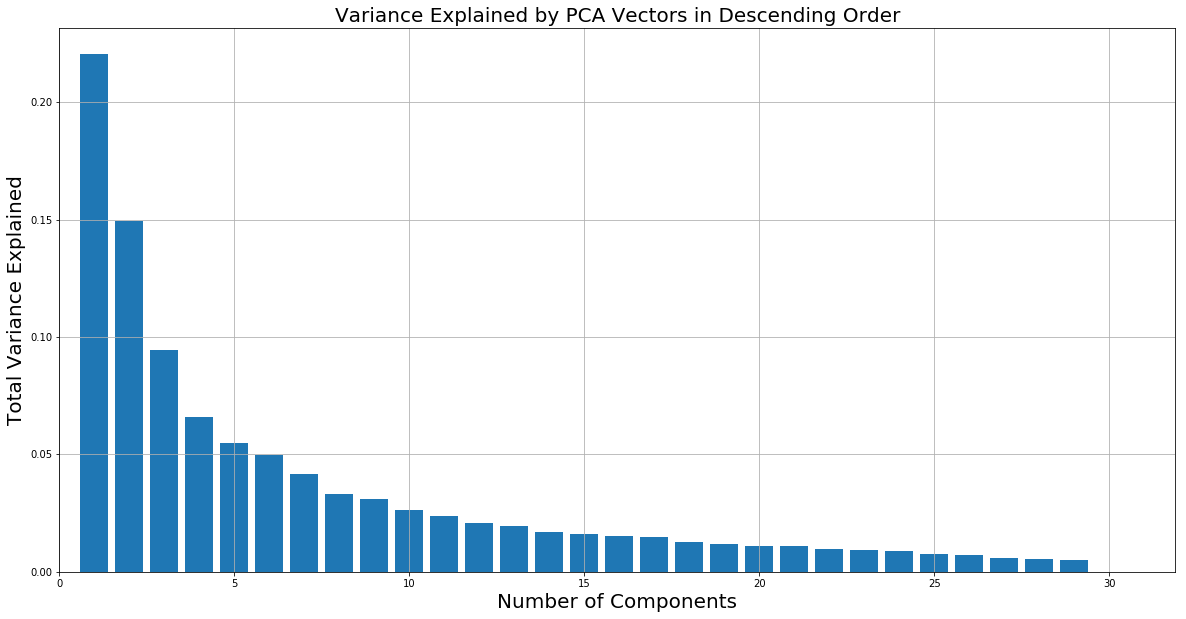

In [5]:
# plot variance results
plt.figure(figsize=(20,10))
plt.title("Variance Explained by PCA Vectors in Descending Order", fontsize=20)
plt.xlabel("Number of Components", fontsize=20)
plt.ylabel("Total Variance Explained", fontsize=20)
plt.bar(c_range, variances[-1]['variance'])
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.grid(True)
plt.show()

**Do you need all the vectors to represent the data? Discuss.**

We can see based on the graph above that variance decreases very quickly as the number of components increase, which proves that most of the information about the images can be represented in just a few vectors. Therefore, it is not necessary to use all of vectors to represent the data. 

**How well-clustered is your data? For every sample, ﬁnd the nearest neighbour (L2 distance), and check whether it is of the same class. What fraction of your data has a neighbour of the same class? Do this both in the original pixel space and the eigenspace, then compare the values; would you expect there to be a signiﬁcant diﬀerence?**

In [6]:
# computes index of nearest neighbour
def nearest_neighbour_index(sample, dataset, index):
    l2_distances = []
    for i in range(len(dataset)):
        if i == index:
            l2_distances.append(float('inf'))
        else:
            l2_distances.append(np.linalg.norm(dataset[i] - sample, ord=2))
    min_index = np.argmin(l2_distances)
    return np.argmin(l2_distances)

pred = []

# use original data 
for i in range(len(train_x)):
    nn_index = nearest_neighbour_index(train_x[i], train_x, i)
    pred.append(train_y[nn_index])
print('Accuracy Score (Original Data): {}'.format(accuracy_score(train_y, pred)))
print('Predictions : {}'.format(pred))
print('Ground Truth: {} \n'.format(train_y))

pred = []

# use 20 principal components 
pca_20 = variances[19]['components']
for i in range(len(train_x)):
    nn_index = nearest_neighbour_index(pca_20[i], pca_20, i)
    pred.append(train_y[nn_index])
print('Accuracy Score (20 PCA Components): {}'.format(accuracy_score(train_y, pred)))
print('Predictions : {}'.format(pred))
print('Ground Truth: {}'.format(train_y))


Accuracy Score (Original Data): 0.6
Predictions : [1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1]
Ground Truth: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

Accuracy Score (20 PCA Components): 0.6333333333333333
Predictions : [0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1]
Ground Truth: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


As shown above, only about 60% of the data has a neighbour of the same class when using the original data. There is only a small improvement when using the PCA components instead, at 63%.

While it is not clearly shown in the results above, it is expected that there would be a significant difference between the original pixel space and the eigenspace. This is due to the curse of dimensionality in the fact that higher dimension euclidean distances become obsolete. All the distances are very similar. The images are currently 96x96 flatten images which do not have very high dimensionality, hence the differences are not noticeable. However, if we were to increase the sizes of the original image, then the difference would be more obvious in a sense that the accuracy would be much lower when PCA is not used.

## 3 - Face Detection and Identification

**You will now detect the faces in the group image. Use a sliding window to detect whether a section of the image contains a face. Set a threshold on the distance in eigenspace between the window contents and your training data.**

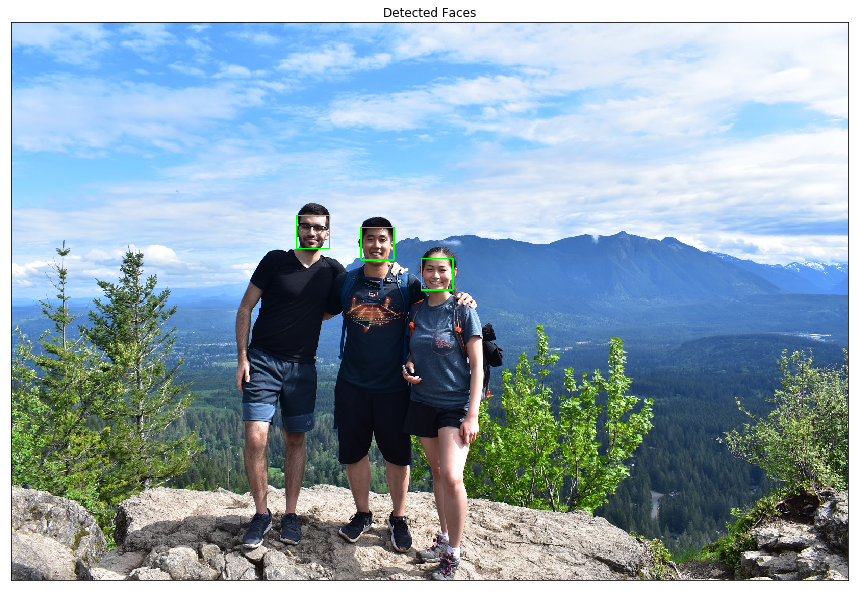

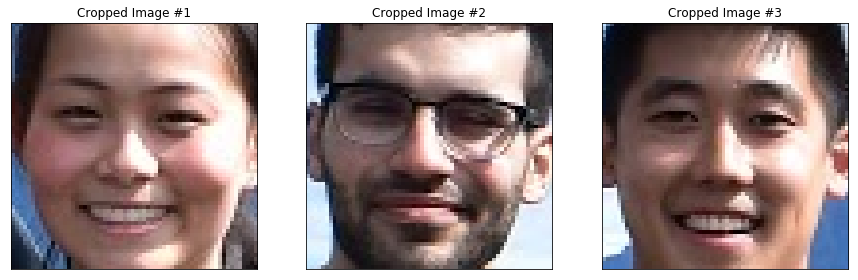

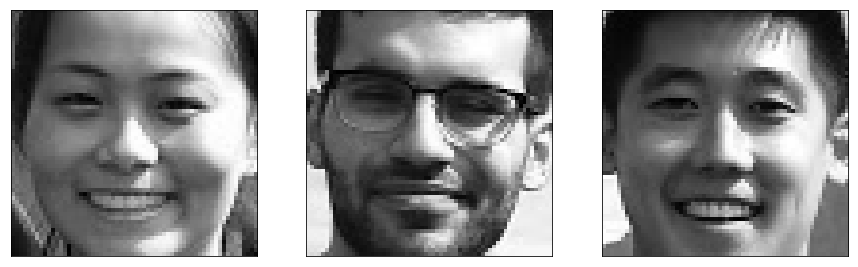

In [7]:
# use cascade classifier to detect faces
face_front = cv2.CascadeClassifier('./classifiers/lbpcascade_frontalface.xml')
faces = face_front.detectMultiScale(original_test_image, 1.3, 4)

# copy of original image for drawing detections
detections = original_test_image.copy()

# crop faces for prediction - one colour set for display purposes and grayscale set for computations
cropped_images = []
test_x = []

for (x, y, w, h) in faces: 
    cv2.rectangle(detections, (x,y), (x+w, y+h), (0,255,0), 2)
    cropped_original = original_test_image[y:y+h, x:x+w]
    cropped_gray = test_image[y:y+h, x:x+w]
    cropped_images.append(cropped_original)
    test_x.append(cropped_gray)
    
# show the detections
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(detections, cv2.COLOR_BGR2RGB))
plt.title('Detected Faces'), plt.xticks([]), plt.yticks([])
plt.show()

# show cropped images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv2.cvtColor(cropped_images[0], cv2.COLOR_BGR2RGB))
plt.title('Cropped Image #1'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(cropped_images[1], cv2.COLOR_BGR2RGB))
plt.title('Cropped Image #2'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.cvtColor(cropped_images[2], cv2.COLOR_BGR2RGB))
plt.title('Cropped Image #3'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(test_x[0], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(test_x[1], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(test_x[2], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


**You will now try to recognize each of the people in the group image. For the windows in which a face is detected, map the window to your eigenspace and ﬁnd the nearest neighbour from your data. Identity of the test case will be based on the identity of the closest person in the training set. How well does the method work? How many false positive face detections do you get? For mis-identiﬁed faces, report the number of neighbours you need before getting the correct label (correct identiﬁcation would use 1). In which situations would expect the approach to fail, and what could you do to improve it?**

Predictions


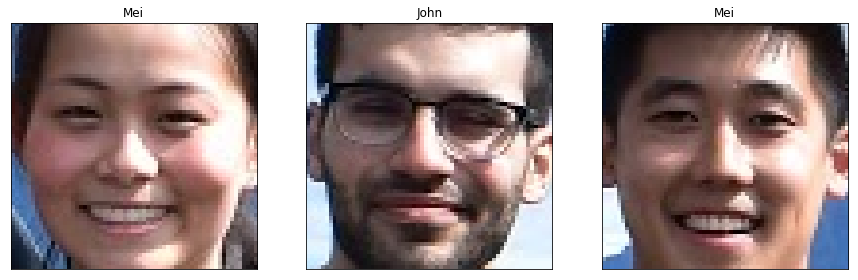

In [8]:
# normalize and flatten images
for i in range(len(test_x)):
    test_x[i] = cv2.resize(test_x[i], (96, 96))
    test_x[i] = np.float64(test_x[i])
    test_x[i] = test_x[i].reshape(-1)

# we want 20 principal components, so add 17 more samples with zeros
padded = test_x.copy()
for i in range(17):
    zeros = np.zeros(96*96)
    padded.append(zeros)
    
# normalize pixels to a mean of 0
scaler = StandardScaler()
std_x = scaler.fit_transform(padded)

# apply pca on 20 components
pca = PCA(n_components=20)
components = pca.fit_transform(std_x)

# make predictions
pred = []
for i in range(3):
    nn_index = nearest_neighbour_index(components[i], pca_20, 100)
    pred.append(train_y[nn_index])
    
class_map = {0: 'John', 1: 'Elie', 2: 'Mei'}
    
# show predictions
print('Predictions')
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv2.cvtColor(cropped_images[0], cv2.COLOR_BGR2RGB))
plt.title(class_map[pred[0]]), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(cropped_images[1], cv2.COLOR_BGR2RGB))
plt.title(class_map[pred[1]]), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.cvtColor(cropped_images[2], cv2.COLOR_BGR2RGB))
plt.title(class_map[pred[2]]), plt.xticks([]), plt.yticks([])
plt.show()

There were no false positives when detecting faces, since the background was mainly skies, trees, and mountains which are easily differentiable from faces. The nearest neighbour method was only able to classify Mei's face accurately, while misclassifying John and Elie. This implementation of classifying faces typically would only work with a very ideal dataset where pictures are taken with fully constant parameters (same angle, same lighting, same scale, etc). Since the pictures used for this implementation were taken in different settings, different times, and slightly different angles, it is very prone to error and misclassification as shown above. Dimensionality reduction using PCA improves the classifications slightly, but is still not a very effective approach when it comes to varied parameters.

## 4 - Viola Jones Comparison
**Use an existing implementation of the Viola-Jones face detector, and compare the results with your detector (e.g. how many false positives do you obtain?). Under what conditions would you expect the Viola-Jones detector to work when PCA does not?** 

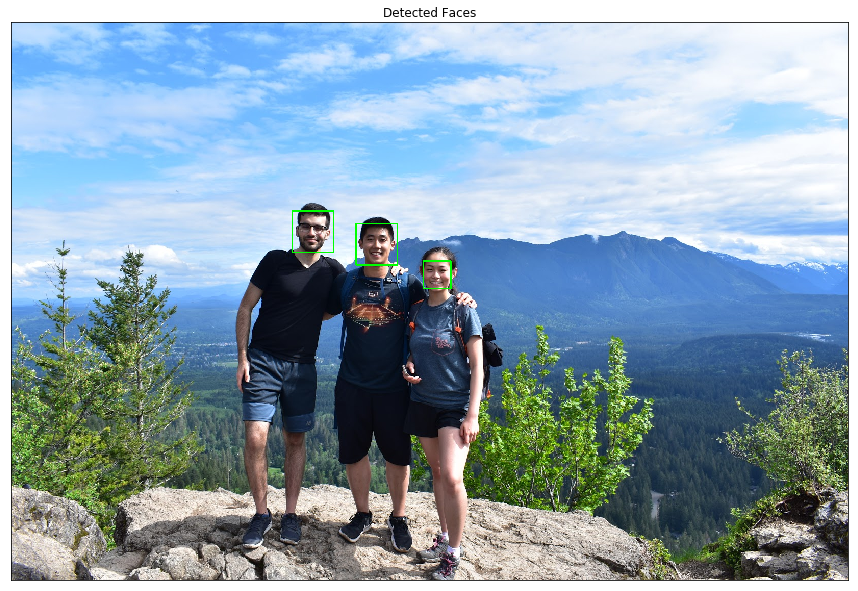

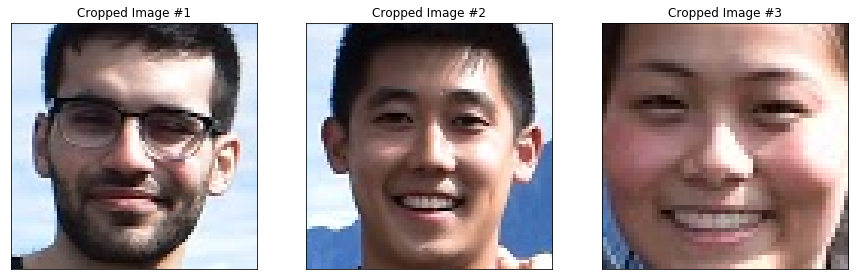

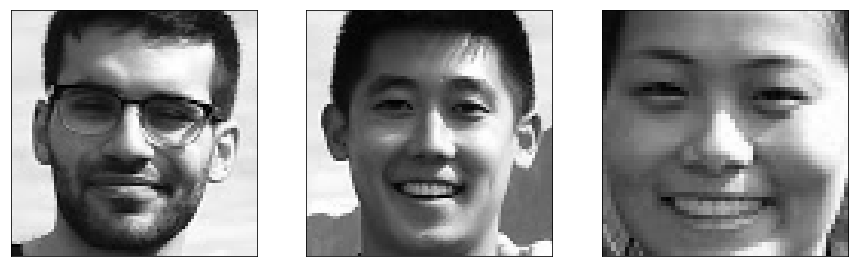

In [9]:
# use cascade classifier to detect faces
face_front = cv2.CascadeClassifier('./classifiers/haarcascade_frontalface_default.xml')
faces = face_front.detectMultiScale(original_test_image, 1.5, 4)

# copy of original image for drawing detections
detections = original_test_image.copy()

# crop faces for prediction - one colour set for display purposes and grayscale set for computations
cropped_images = []
test_x = []

for (x, y, w, h) in faces: 
    cv2.rectangle(detections, (x,y), (x+w, y+h), (0,255,0), 2)
    cropped_original = original_test_image[y:y+h, x:x+w]
    cropped_gray = test_image[y:y+h, x:x+w]
    cropped_images.append(cropped_original)
    test_x.append(cropped_gray)
    
# show the detections
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(detections, cv2.COLOR_BGR2RGB))
plt.title('Detected Faces'), plt.xticks([]), plt.yticks([])
plt.show()

# show cropped images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv2.cvtColor(cropped_images[0], cv2.COLOR_BGR2RGB))
plt.title('Cropped Image #1'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(cropped_images[1], cv2.COLOR_BGR2RGB))
plt.title('Cropped Image #2'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.cvtColor(cropped_images[2], cv2.COLOR_BGR2RGB))
plt.title('Cropped Image #3'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(test_x[0], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(test_x[1], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(test_x[2], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


Predictions


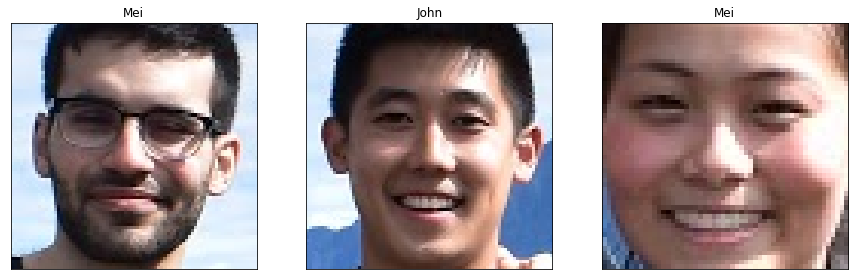

In [11]:
# normalize and flatten images
for i in range(len(test_x)):
    test_x[i] = cv2.resize(test_x[i], (96, 96))
    test_x[i] = np.float64(test_x[i])
    test_x[i] = test_x[i].reshape(-1)

# we want 20 principal components, so add 17 more samples with zeros
padded = test_x.copy()
for i in range(17):
    zeros = np.zeros(96*96)
    padded.append(zeros)
    
# normalize pixels to a mean of 0
scaler = StandardScaler()
std_x = scaler.fit_transform(padded)

# apply pca on 20 components
pca = PCA(n_components=20)
components = pca.fit_transform(std_x)

# make predictions
pred = []
for i in range(3):
    nn_index = nearest_neighbour_index(components[i], pca_20, 100)
    pred.append(train_y[nn_index])
    
class_map = {0: 'John', 1: 'Elie', 2: 'Mei'}
    
# show predictions
print('Predictions')
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv2.cvtColor(cropped_images[0], cv2.COLOR_BGR2RGB))
plt.title(class_map[pred[0]]), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(cropped_images[1], cv2.COLOR_BGR2RGB))
plt.title(class_map[pred[1]]), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.cvtColor(cropped_images[2], cv2.COLOR_BGR2RGB))
plt.title(class_map[pred[2]]), plt.xticks([]), plt.yticks([])
plt.show()

The Viola-Jones detector was able to detect exactly 3 faces as well with no false positives. The detections also allowed us to predict Mei and John correctly this time. However, it still misclassified Elie, once again due to our training set having varying parameters in setting.